<a href="https://colab.research.google.com/github/ChronoConstant/Grocer_Sales_Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

In [35]:
sales_predictions = '/content/drive/MyDrive/Coding_Dojo/Data_for_Class/sales_predictions.csv'
df_sales = pd.read_csv(sales_predictions)
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [36]:
#I'm not immediately noticing any correlations to the missing data so I assume its at random.
#the missing data doesnt make up enough of the overall data set to delete it entirely.
#a closer look shows that there are item weights available for the same item and these values just got missed so you could pull those weights from other identical items based on the item code.


df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
#Tells me I want to avoid removing any data because each row is unique.
df_sales.duplicated(['Item_Identifier', 'Outlet_Identifier']).any()

False

In [38]:
item = df_sales['Item_Identifier']
item.value_counts()

FDW13    10
FDG33    10
FDW26     9
FDU12     9
FDT07     9
         ..
FDN52     1
DRF48     1
FDC23     1
FDQ60     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [39]:
# I used this to check and make sure there were multiple instances of some of the item codes and that some of them have the item weights in place and some do not.
df_sales.loc[df_sales['Item_Identifier'] == 'FDG33']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,NaN,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
1575,FDG33,NaN,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
2728,FDG33,5.365,Regular,0.234733,Seafood,173.4764,OUT010,1998,NaN,Tier 3,Grocery Store,171.7764
4747,FDG33,5.365,Regular,0.140458,Seafood,169.7764,OUT049,1999,Medium,Tier 1,Supermarket Type1,3263.7516
5164,FDG33,5.365,Regular,0.140240,Seafood,171.0764,OUT046,1997,Small,Tier 1,Supermarket Type1,3263.7516
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,NaN,Tier 2,Supermarket Type1,858.8820
7011,FDG33,5.365,Regular,0.140812,Seafood,173.5764,OUT018,2009,Medium,Tier 3,Supermarket Type2,2061.3168
7098,FDG33,5.365,Regular,0.140124,Seafood,172.0764,OUT013,1987,High,Tier 3,Supermarket Type1,2748.4224
7726,FDG33,5.365,Regular,0.140214,Seafood,173.7764,OUT035,2004,Small,Tier 2,Supermarket Type1,4637.9628


In [40]:
df_sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [41]:
out010_filter = df_sales['Outlet_Identifier'] == 'OUT019'
outsize_filter = df_sales['Outlet_Size'].notnull()




In [42]:
# Checking to see if any of the outlets had some of the sizes and not others. didnt find any obvious cases.
df_sales.loc[out010_filter & outsize_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [43]:
import matplotlib.pyplot as plt

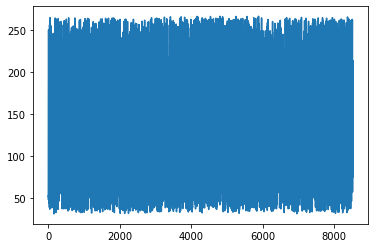

In [44]:
#beginning the hunt for Outliers
plt.plot(df_sales['Item_MRP'])

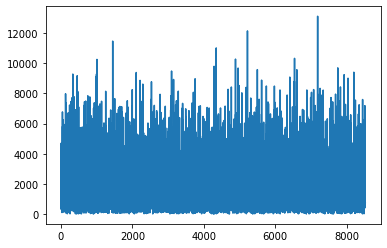

In [45]:
# Some clear outliers in outlet sales but not statistically impossible.
plt.plot(df_sales['Item_Outlet_Sales'])

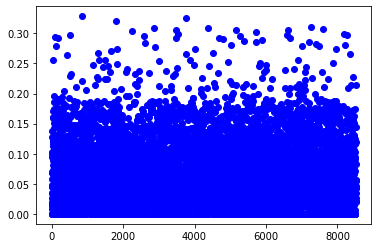

In [46]:
# Seeing zeros in here which seems unlikely. for it to be sold it would have to be on shelves
plt.plot(df_sales['Item_Visibility'], 'bo')

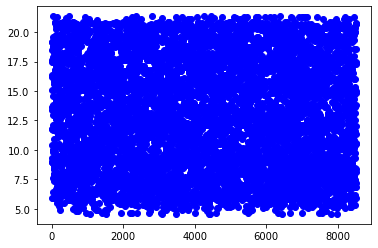

In [47]:

plt.plot(df_sales['Item_Weight'], 'bo')

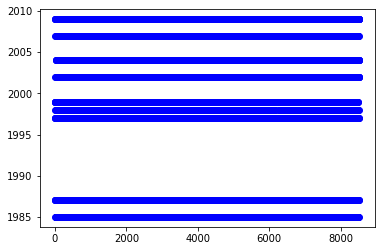

In [48]:
plt.plot(df_sales['Outlet_Establishment_Year'], 'bo')

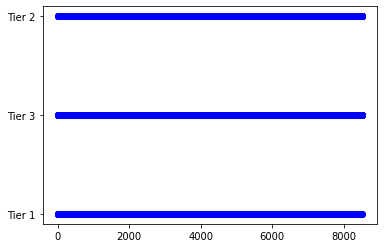

In [49]:
plt.plot(df_sales['Outlet_Location_Type'], 'bo')

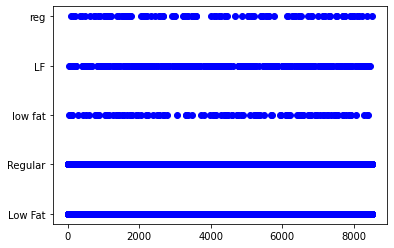

In [50]:
#Heres something I can fix. both low fat and regular have multiple input types(shortened/initialed) 
# Use pandas .replace() to find and replace with the appropriate names. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
plt.plot(df_sales['Item_Fat_Content'], 'bo')

In [51]:
df_sales = df_sales.replace(['low fat', 'LF'], 'Low Fat')

In [54]:
df_sales = df_sales.replace('reg', 'Regular')

In [55]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [56]:
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [57]:
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64